In [2]:
import pandas as pd
import numpy
#!pip install imbalanced-learn
from nltk.corpus import stopwords
import re
import string
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

C:\Users\ranja\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('/Users/ranja/Downloads/cyberbullying_tweets.csv/cyberbullying_tweets.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [7]:
#renaming
data = data.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
data.sample(10)

,text,sentiment
32679,Why him Just.. Why did he have to bother him?!...,age
3089,Anyone else sick of hearing #Smashitoutoftheba...,not_cyberbullying
4853,RT @curdistani: Sources; ISIS terrorists hunti...,not_cyberbullying
42014,"If white people suddenly want to call Blacks ""...",ethnicity
36715,period periodt girls chanting saying it over a...,age
1748,I wont be bringing back my love ..i wont be co...,not_cyberbullying
26408,"@Venomous9 pro death penalty, anti some provis...",other_cyberbullying
13361,"Fuck off forever, dickweed. @RedDogRoberts: @L...",gender
13563,RT @asredasmyhair: They claim to be for equali...,gender
32534,sadly was the dilemma I faced in teaching midd...,age


In [8]:
data["sentiment_encoded"] = data['sentiment'].replace({"religion": 1, "age": 2, "ethnicity": 3, "gender": 4, "other_cyberbullying": 5,"not_cyberbullying": 6})
data.sample(10)


C:\Users\ranja\AppData\Local\Temp\ipykernel_23216\1988174554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sentiment_encoded"] = data['sentiment'].replace({"religion": 1, "age": 2, "ethnicity": 3, "gender": 4, "other_cyberbullying": 5,"not_cyberbullying": 6})


,text,sentiment,sentiment_encoded
44847,The organization is has been called UNCF since...,ethnicity,3
19578,The muslims in this video are black btw you idiot,religion,1
36605,When the girls who bullied me in high school f...,age,2
19519,@ibnHlophe @eeviewonders @CTFleaMarkets Jews u...,religion,1
25793,I repeat... What the bloody hell is happening!...,other_cyberbullying,5
12917,"So you can be offended by Gay jokes, but a con...",gender,4
12686,//they would call her a bitch for being a comp...,gender,4
350,@TherealTaraji Ck us out www.hbhliveapparel.co...,not_cyberbullying,6
41925,Just drop one single first naw missed ur sound,ethnicity,3
11232,@JuicyJayyx Girl No Tf It's NotÃ°ÂÂÂÃ°ÂÂÂ...,gender,4


In [9]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

In [11]:
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [12]:
def preprocess(text):
    text = decontract(text)
    text = strip_all_entities(text)
    return text

In [13]:
data

,text,sentiment,sentiment_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3


In [14]:
data['cleaned_text'] = data['text'].apply(preprocess)
data.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isis account pretending kurdish account like i...


In [15]:
data["cleaned_text"].duplicated().sum()

2977

In [16]:
data.drop_duplicates("cleaned_text", inplace=True)

In [17]:
data.sentiment.value_counts()


sentiment
religion               7955
age                    7898
ethnicity              7777
not_cyberbullying      7657
gender                 7628
other_cyberbullying    5800
Name: count, dtype: int64

In [18]:
text_len = []
for text in data.cleaned_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [19]:
data['text_len'] = text_len

In [20]:
data

,text,sentiment,sentiment_encoded,cleaned_text,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,words katandandre food crapilicious mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classy whore red velvet cupcakes,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thanks heads concerned another angry dud...,9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isis account pretending kurdish account like i...,8
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3,black ppl expected anything depended anything ...,21
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3,turner withhold disappointment turner called c...,29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3,yea fuck rt youre nigger fucking unfollow fuck...,10


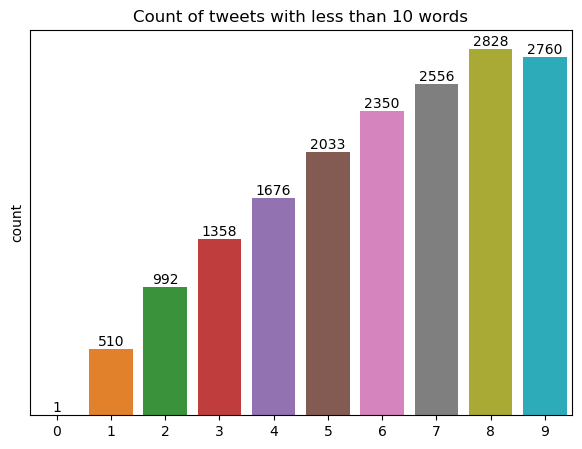

In [21]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<10])
plt.title('Count of tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [22]:
data.sort_values(by=['text_len'], ascending=False)
data

,text,sentiment,sentiment_encoded,cleaned_text,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,words katandandre food crapilicious mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classy whore red velvet cupcakes,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thanks heads concerned another angry dud...,9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isis account pretending kurdish account like i...,8
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3,black ppl expected anything depended anything ...,21
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3,turner withhold disappointment turner called c...,29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3,yea fuck rt youre nigger fucking unfollow fuck...,10


In [23]:
#removing tweets less than 3 words and more than 100 words
data = data[data['text_len'] > 3]
data = data[data['text_len'] < 100]

In [24]:
data

,text,sentiment,sentiment_encoded,cleaned_text,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,words katandandre food crapilicious mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classy whore red velvet cupcakes,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thanks heads concerned another angry dud...,9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isis account pretending kurdish account like i...,8
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3,black ppl expected anything depended anything ...,21
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3,turner withhold disappointment turner called c...,29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3,yea fuck rt youre nigger fucking unfollow fuck...,10


In [28]:
!pip install wordcloud


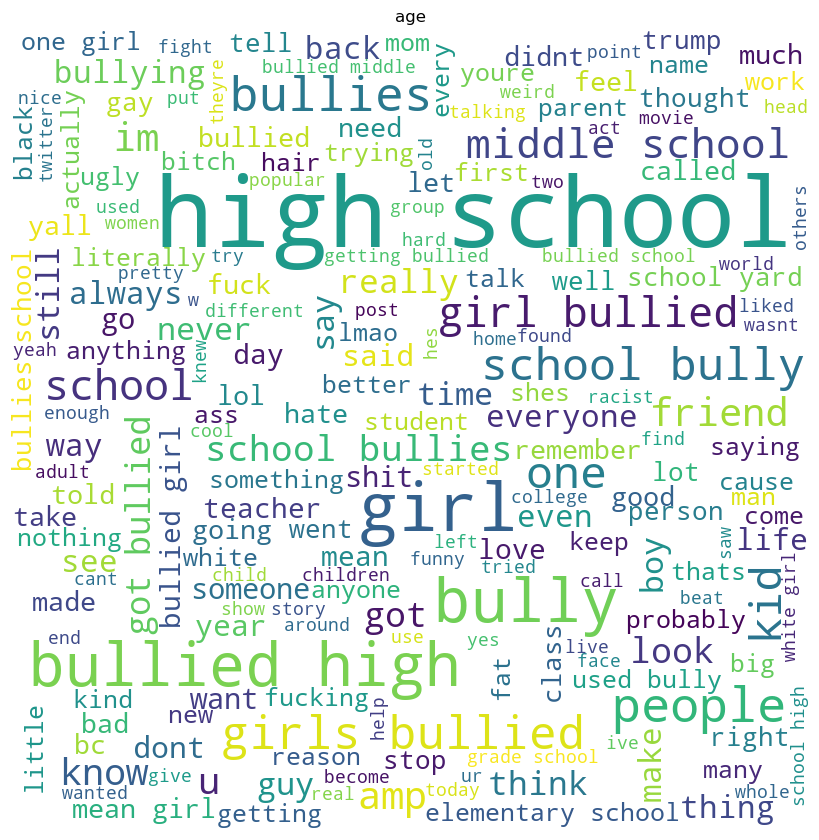

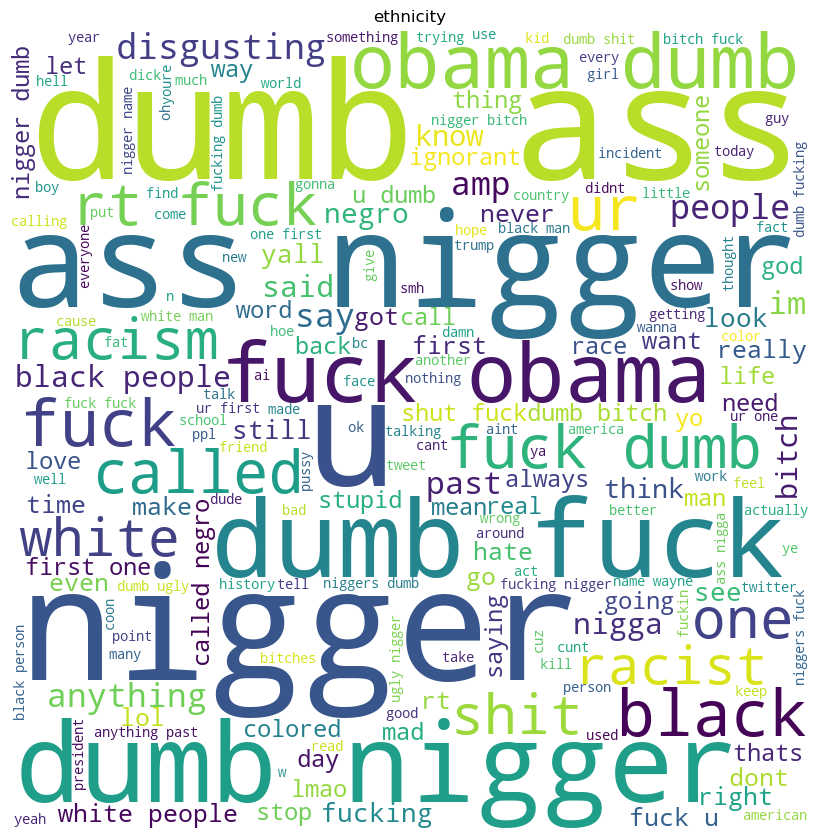

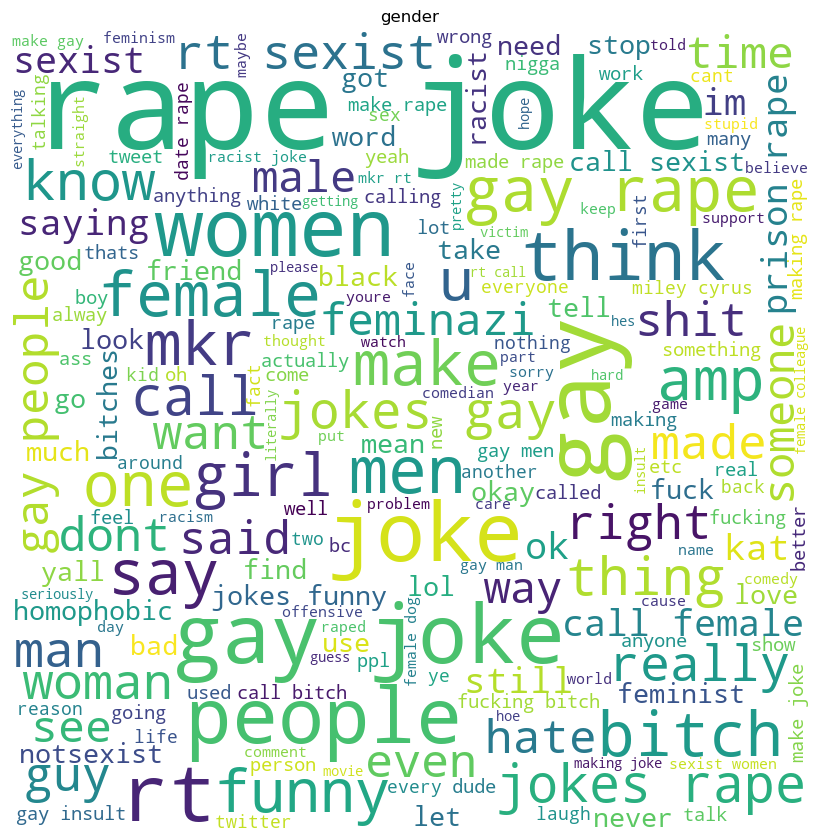

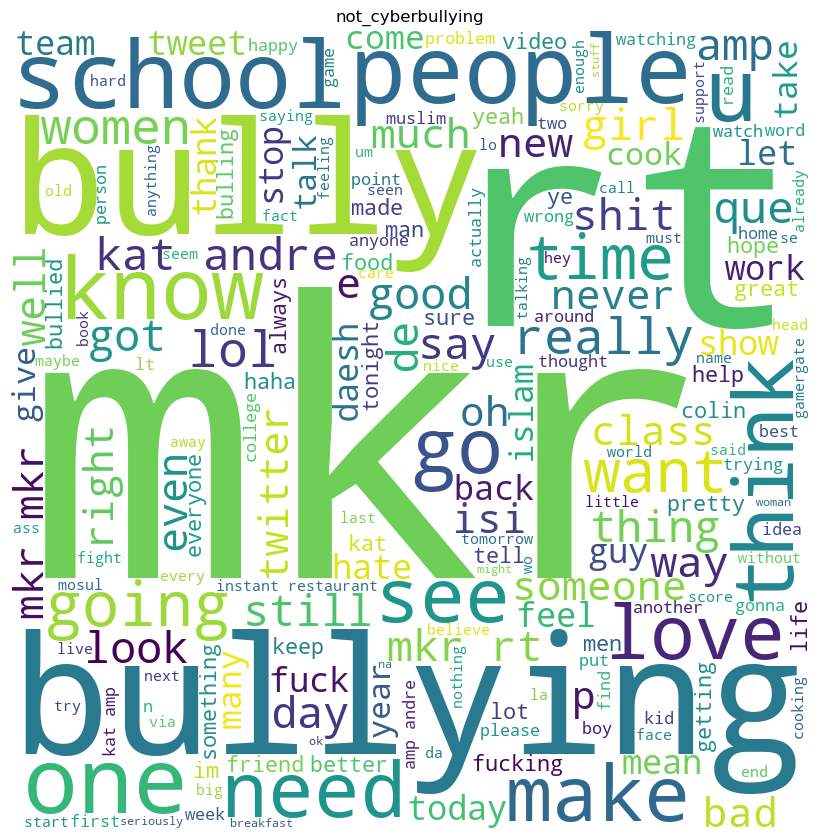

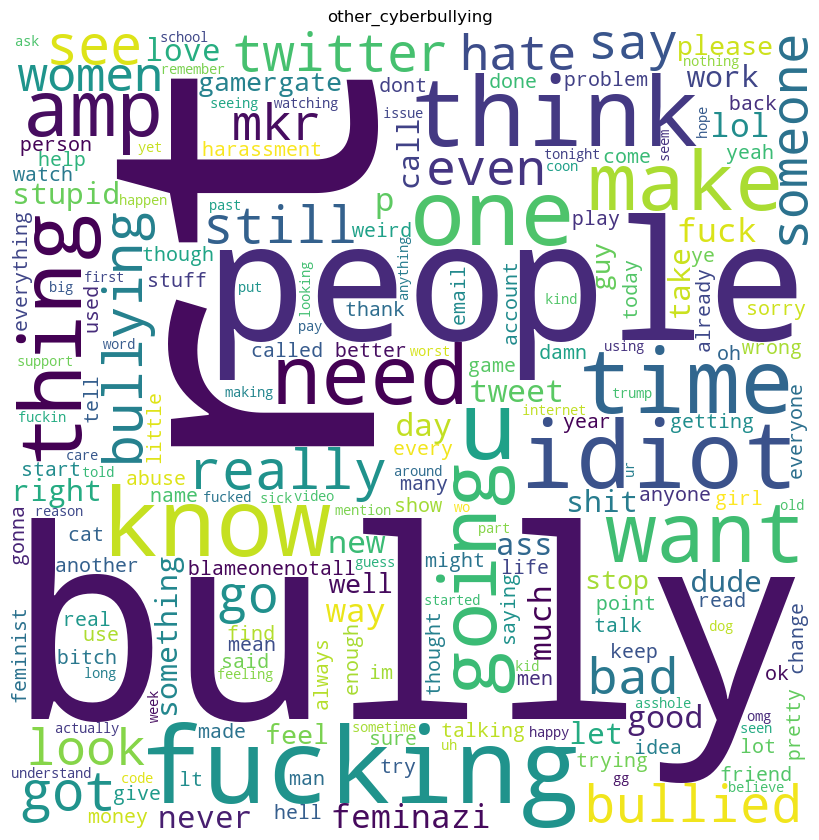

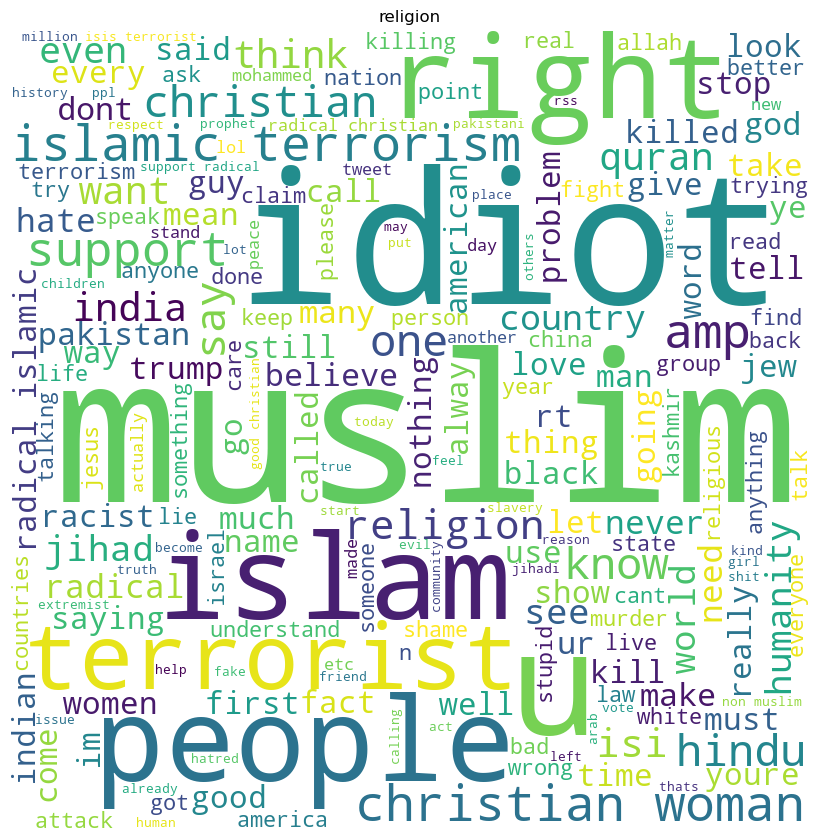

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
data.sentiment = lenc.fit_transform(data.sentiment)

for c in range(len(lenc.classes_)):
    string = ""
    for i in data[data.sentiment == c].cleaned_text.values:
        string = string + " " + i.strip()

    #custom_mask = np.array(Image.open('../input/twitter-pic/twitter.png')) 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(data['cleaned_text'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [27]:
X_tf

<41842x46497 sparse matrix of type '<class 'numpy.float64'>'
	with 548319 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, data['sentiment'], test_size=0.20, stratify=data['sentiment'], random_state=42)
y_train.value_counts()

sentiment
5    6321
0    6271
1    6188
2    5863
3    5089
4    3741
Name: count, dtype: int64

In [67]:
!pip install imblearn

In [29]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[0] != vc[4]) or (vc[0] !=  vc[2]) or (vc[0] !=  vc[3]) or (vc[0] !=  vc[1]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

sentiment
4    6321
5    6321
0    6321
2    6321
1    6321
3    6321
Name: count, dtype: int64

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=42, n_jobs=-1),
}

df_results = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1'])

for key in classifiers:
    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    classification = classification_report(y_test, y_pred)

    row = pd.DataFrame({'model': [key], 'accuracy': [accuracy], 'precision': [precision], 'recall': [recall], 'f1': [f1]})
    df_results = pd.concat([df_results, row], ignore_index=True)

    print(f"Classification Report - {key}:")
    print(classification)
    print("-----------------------------------")

df_results.head(10)


C:\Users\ranja\AppData\Local\Temp\ipykernel_23216\3893286014.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, row], ignore_index=True)


Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70      1568
           1       0.95      0.78      0.86      1547
           2       0.89      0.71      0.79      1466
           3       0.37      0.46      0.41      1272
           4       0.22      0.75      0.34       935
           5       0.94      0.15      0.26      1581

    accuracy                           0.55      8369
   macro avg       0.72      0.57      0.56      8369
weighted avg       0.77      0.55      0.58      8369

-----------------------------------
Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1568
           1       0.88      0.93      0.91      1547
           2       0.85      0.83      0.84      1466
           3       0.71      0.41      0.52      1272
           4       0.58      0.50      0.53       935
           5  

,model,accuracy,precision,recall,f1
0,K-Nearest Neighbors,0.553232,0.767366,0.553232,0.576557
1,Naive Bayes,0.804158,0.793751,0.804158,0.789625
2,Random Forest,0.820528,0.828736,0.820528,0.818890


In [31]:
import numpy as np
results = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
results['result'] = np.where(results['predictions']==results['actual'], 1, 0)
results

,predictions,actual,result
32354,0,0,1
44803,1,1,1
41386,1,1,1
33242,0,0,1
20065,5,5,1
...,...,...,...
32423,0,0,1
6858,3,3,1
1315,4,3,0
16887,5,5,1


In [32]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each algorithm
for key in classifiers:
    classifier = classifiers[key]
    scores = cross_val_score(classifier, X_train, y_train, cv=3)
    
    # Print the cross-validation score for the current algorithm
    print(f'Cross-validation score ({key}): {scores.mean()}')

Cross-validation score (K-Nearest Neighbors): 0.5675526024363233
Cross-validation score (Naive Bayes): 0.8058324104835733
Cross-validation score (Random Forest): 0.7980804724990772
